# Assignment 5 - Perceptron

## Part 1

### Plot data from data.csv


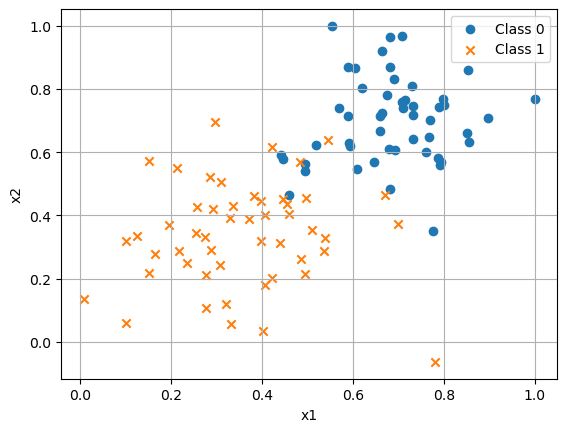

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
dataFrame = pd.read_csv("data.csv", header=None)
dataFrame.columns = ["x1", "x2", "label"]

points = dataFrame[["x1", "x2"]].values
labels = dataFrame["label"].values.astype(float)
numSamples = len(labels)

def plotData(points, labels):
    plt.scatter(points[labels == 0, 0], points[labels == 0, 1], marker="o", label="Class 0")
    plt.scatter(points[labels == 1, 0], points[labels == 1, 1], marker="x", label="Class 1")
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.grid(True)
    plt.legend()

plotData(points, labels)

# used to frame the graphs
xMin, xMax = points[:, 0].min() - 0.2, points[:, 0].max() + 0.2
yMin, yMax = points[:, 1].min() - 0.2, points[:, 1].max() + 0.2
lineXs = np.linspace(xMin, xMax, 200)

### Perceptron Using The Heuristic Approach

Epoch 1: misclassified = 50
Epoch 2: misclassified = 53
Epoch 3: misclassified = 57
Epoch 4: misclassified = 55
Epoch 5: misclassified = 52
Epoch 6: misclassified = 47
Epoch 7: misclassified = 44
Epoch 8: misclassified = 41
Epoch 9: misclassified = 36
Epoch 10: misclassified = 34
Epoch 11: misclassified = 34
Epoch 12: misclassified = 29
Epoch 13: misclassified = 28
Epoch 14: misclassified = 25
Epoch 15: misclassified = 22
Epoch 16: misclassified = 16
Epoch 17: misclassified = 15
Epoch 18: misclassified = 13
Epoch 19: misclassified = 17
Epoch 20: misclassified = 16
Epoch 21: misclassified = 11
Epoch 22: misclassified = 15
Epoch 23: misclassified = 10
Epoch 24: misclassified = 10
Epoch 25: misclassified = 10
Epoch 26: misclassified = 11
Epoch 27: misclassified = 10
Epoch 28: misclassified = 10
Epoch 29: misclassified = 11
Epoch 30: misclassified = 11
Epoch 31: misclassified = 10
Epoch 32: misclassified = 11
Epoch 33: misclassified = 11
Epoch 34: misclassified = 11
Epoch 35: misclassified

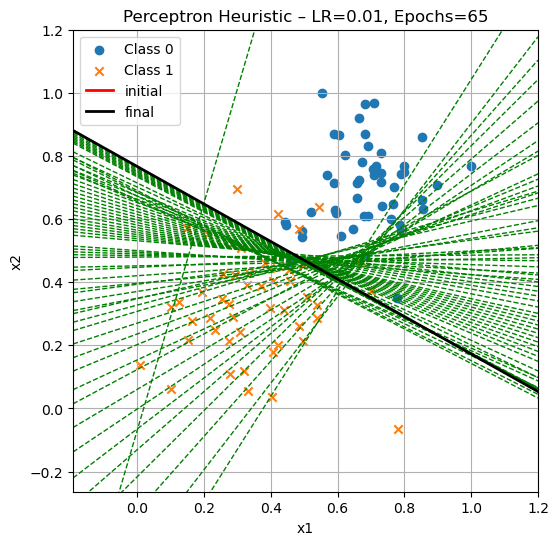

Epoch 1: misclassified = 49
Epoch 2: misclassified = 49
Epoch 3: misclassified = 49
Epoch 4: misclassified = 47
Epoch 5: misclassified = 47
Epoch 6: misclassified = 44
Epoch 7: misclassified = 39
Epoch 8: misclassified = 26
Epoch 9: misclassified = 32
Epoch 10: misclassified = 34
Epoch 11: misclassified = 23
Epoch 12: misclassified = 24
Epoch 13: misclassified = 26
Epoch 14: misclassified = 27
Epoch 15: misclassified = 7
Epoch 16: misclassified = 7
Epoch 17: misclassified = 7
Epoch 18: misclassified = 8
Epoch 19: misclassified = 11
Epoch 20: misclassified = 12
Epoch 21: misclassified = 13
Epoch 22: misclassified = 13
Epoch 23: misclassified = 14
Epoch 24: misclassified = 15
Epoch 25: misclassified = 18
Epoch 26: misclassified = 19
Epoch 27: misclassified = 19
Epoch 28: misclassified = 20
Epoch 29: misclassified = 21
Epoch 30: misclassified = 21
Epoch 31: misclassified = 20
Epoch 32: misclassified = 21
Epoch 33: misclassified = 21
Epoch 34: misclassified = 22
Epoch 35: misclassified = 2

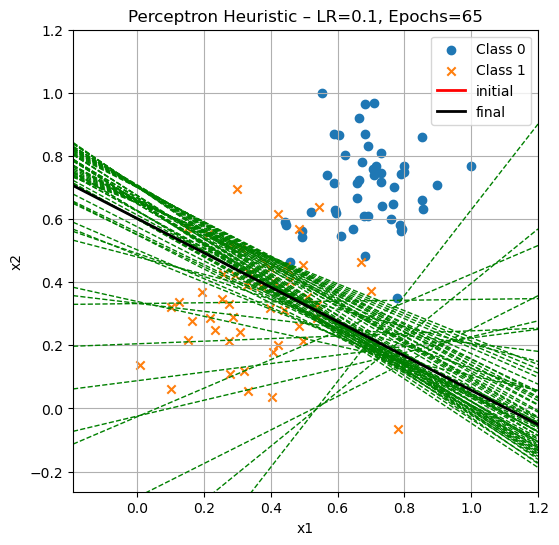

Epoch 1: misclassified = 50
Epoch 2: misclassified = 50
Epoch 3: misclassified = 45
Epoch 4: misclassified = 49
Epoch 5: misclassified = 50
Epoch 6: misclassified = 33
Epoch 7: misclassified = 41
Epoch 8: misclassified = 43
Epoch 9: misclassified = 17
Epoch 10: misclassified = 20
Epoch 11: misclassified = 24
Epoch 12: misclassified = 31
Epoch 13: misclassified = 33
Epoch 14: misclassified = 34
Epoch 15: misclassified = 15
Epoch 16: misclassified = 16
Epoch 17: misclassified = 16
Epoch 18: misclassified = 18
Epoch 19: misclassified = 24
Epoch 20: misclassified = 25
Epoch 21: misclassified = 28
Epoch 22: misclassified = 28
Epoch 23: misclassified = 28
Epoch 24: misclassified = 7
Epoch 25: misclassified = 7
Epoch 26: misclassified = 7
Epoch 27: misclassified = 12
Epoch 28: misclassified = 13
Epoch 29: misclassified = 14
Epoch 30: misclassified = 15
Epoch 31: misclassified = 15
Epoch 32: misclassified = 16
Epoch 33: misclassified = 16
Epoch 34: misclassified = 19
Epoch 35: misclassified = 

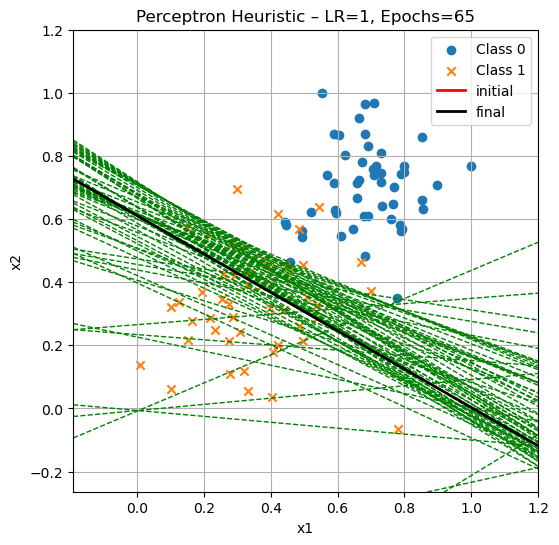

In [12]:
def runPerceptronHeuristic(points, labels, lineXs, learningRate, maxEpochs):
    np.random.seed(0)

    # Random initial parameters
    weights = np.random.randn(2)
    bias = np.random.randn()

    plt.figure(figsize=(6, 6))
    plotData(points, labels)
    if xMin is not None:
        plt.xlim(xMin, xMax)
    if yMin is not None:
        plt.ylim(yMin, yMax)

    # Initial line in red
    if abs(weights[1]) > 1e-8:
        initialYs = -(weights[0] * lineXs + bias) / weights[1]
        plt.plot(lineXs, initialYs, "r-", linewidth=2, label="initial")

    for epoch in range(maxEpochs):
        # training
        for pointVector, trueLabel in zip(points, labels):
            linearOutput = np.dot(weights, pointVector) + bias
            predictedLabel = 1.0 if linearOutput >= 0 else 0.0

            if predictedLabel != trueLabel:
                if predictedLabel == 0.0:
                    bias += learningRate
                    weights += learningRate * pointVector
                else:
                    bias -= learningRate
                    weights -= learningRate * pointVector

        # misclassification counting
        linearOutputs = points @ weights + bias
        predicted = (linearOutputs >= 0).astype(float)
        misclassifiedCount = int(np.sum(predicted != labels))
        print(f"Epoch {epoch + 1}: misclassified = {misclassifiedCount}")

        # Intermediate lines in green and dashed (match this count)
        if abs(weights[1]) > 1e-8:
            lineYs = -(weights[0] * lineXs + bias) / weights[1]
            plt.plot(lineXs, lineYs, "g--", linewidth=1)

        if misclassifiedCount == 0:
            break

    # Final line in black
    if abs(weights[1]) > 1e-8:
        finalYs = -(weights[0] * lineXs + bias) / weights[1]
        plt.plot(lineXs, finalYs, "k-", linewidth=2, label="final")

    plt.title(f"Perceptron Heuristic – LR={learningRate}, Epochs={maxEpochs}")
    plt.legend()
    plt.show()

    return weights, bias


finalWeights, finalBias = runPerceptronHeuristic(
    points=points,
    labels=labels,
    lineXs=lineXs,
    learningRate=0.01,
    maxEpochs=65
)
finalWeights, finalBias = runPerceptronHeuristic(
    points=points,
    labels=labels,
    lineXs=lineXs,
    learningRate=0.1,
    maxEpochs=65
)
finalWeights, finalBias = runPerceptronHeuristic(
    points=points,
    labels=labels,
    lineXs=lineXs,
    learningRate=1,
    maxEpochs=65
)


### Analysis
The heuristic perceptron was tested with three different learning rates (0.01, 0.1, and 1.0) and each for 65 epochs. Across all these runs, the model never actually saw a seperating line with zero misclassifications. The lowest stable value achieved was around 7, suggesting either the dataset is not perfectly linearly separable or that the heuristic perceptron is unable to settle on the optimal boundary within this setup.

#### Learning Rate = 0.01

The misclassification count decreases steadily from around 50 down to approximately 7 by epoch 65. The downward trend slows significantly after between 35 and 30 epochs, indicating the algorithm is approaching a plateau.
The decision boundary lines gradually move up and down in accuracy after epoch 38 but end up consistently settling at around 7 or 8 misclassifications by epoch 65.
This rate provides stable but slow learning.

#### Learning Rate = 0.1

At this learning rate, convergence is much faster early on. The misclassification count drops sharply to 7 by around epoch 15. However, this improvement does not hold for long. After reaching 7, the model begins to oscillate, with misclassification counts moving between 10 and 20 as training continues.
The model frequently overshoots good solutions, and the misclassification count fluctuates between 7 and values above 20 throughout the latter half of training.

#### Learning Rate = 1

This learning rate peforms similar to the last (LR of 0.1) but with even more unstable behavior. The error count bounces between high and low values throughout training, with no sustained downward trend. Although it occasionally reaches low values like 7-9 misclassifications, it immediately jumps back up due to what I assume are overly large updates.
The model doesn't really stablize, with oscillation preventing any meaningful convergence here.

### Part 1 Findings

The low learning rate (0.01) was the slowest but by far the most stable, ultimately converging to around 7 misclassifications.
The Moderate learning rate (0.1) achieved strong early improvements but could not maintain them, overshooting and oscillating between good and poor boundaries. The model did not converge well.
The Large learning rate (1.0) was the most unstable and also showed no prolonged improvement, with large jumps preventing convergence.
Even though none of the runs reached 0 misclassification, the perceptron did find boundaries that separate most of the data (particularly at LR=0.01). It is still true, however, that this heuristic approach struggles to settle on the best boundary, especially at higher learning rates.

## Part 2

### Perceptron Learning By Gradient Descent

Epoch 10: log loss = 0.6864
Epoch 20: log loss = 0.6064
Epoch 30: log loss = 0.5434
Epoch 40: log loss = 0.4938
Epoch 50: log loss = 0.4541
Epoch 60: log loss = 0.4218


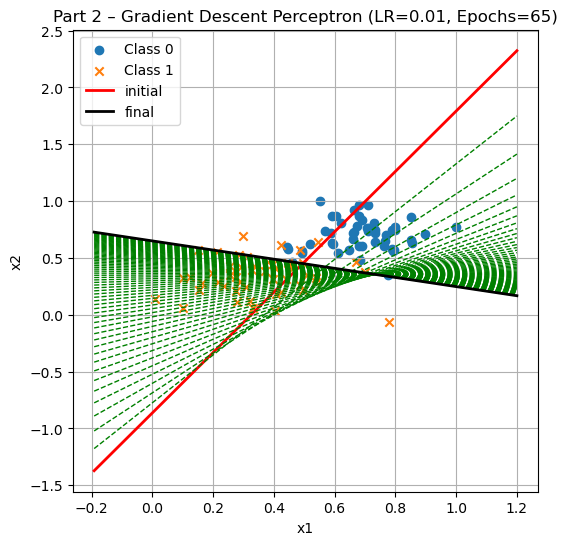

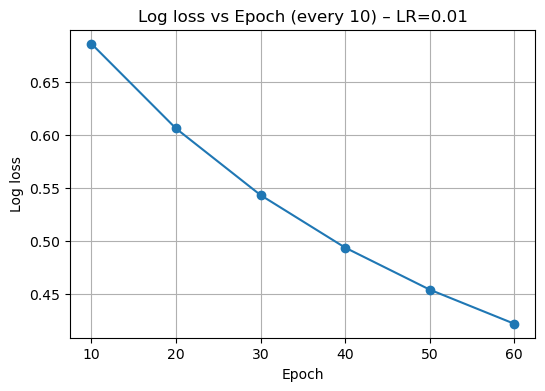

Epoch 10: log loss = 0.4578
Epoch 20: log loss = 0.3003
Epoch 30: log loss = 0.2428
Epoch 40: log loss = 0.2138
Epoch 50: log loss = 0.1964
Epoch 60: log loss = 0.1849


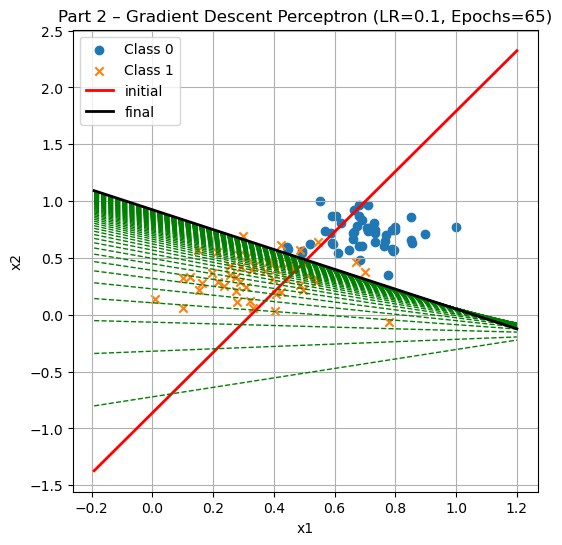

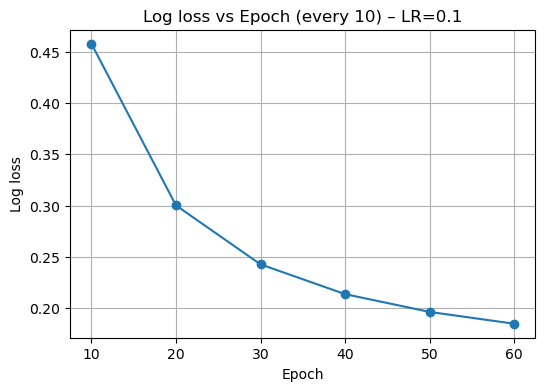

Epoch 10: log loss = 0.5660
Epoch 20: log loss = 0.3703
Epoch 30: log loss = 0.3157
Epoch 40: log loss = 0.2916
Epoch 50: log loss = 0.2784
Epoch 60: log loss = 0.2702


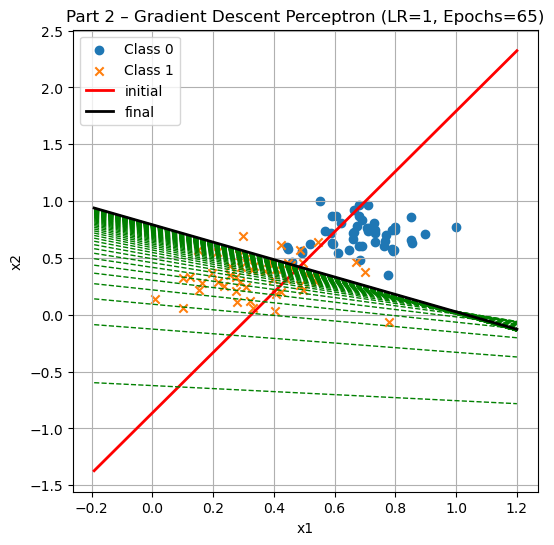

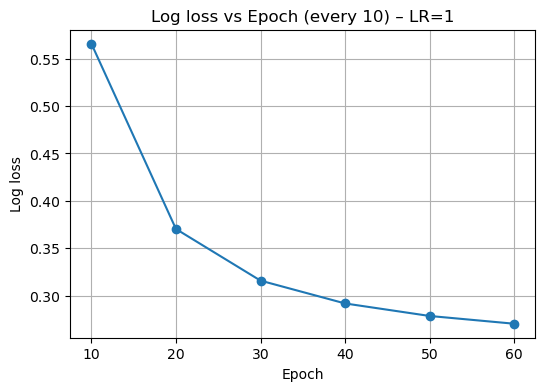

Epoch 10: log loss = 0.6864
Epoch 20: log loss = 0.6064
Epoch 30: log loss = 0.5434
Epoch 40: log loss = 0.4938
Epoch 50: log loss = 0.4541
Epoch 60: log loss = 0.4218
Epoch 70: log loss = 0.3952
Epoch 80: log loss = 0.3729
Epoch 90: log loss = 0.3541
Epoch 100: log loss = 0.3379
Epoch 110: log loss = 0.3238
Epoch 120: log loss = 0.3115
Epoch 130: log loss = 0.3007
Epoch 140: log loss = 0.2911
Epoch 150: log loss = 0.2825
Epoch 160: log loss = 0.2748
Epoch 170: log loss = 0.2678
Epoch 180: log loss = 0.2614
Epoch 190: log loss = 0.2556
Epoch 200: log loss = 0.2503


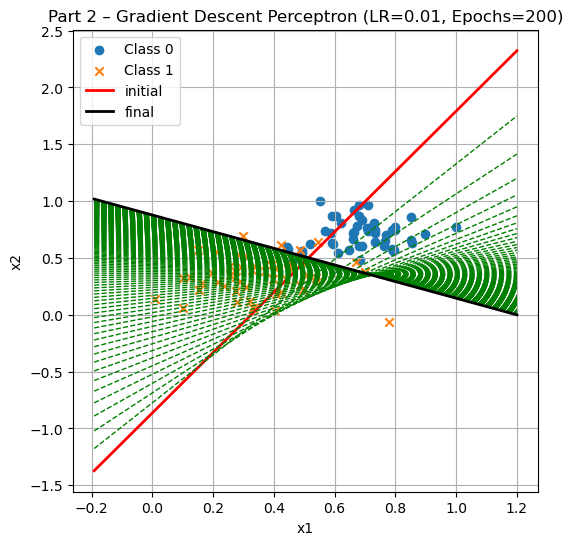

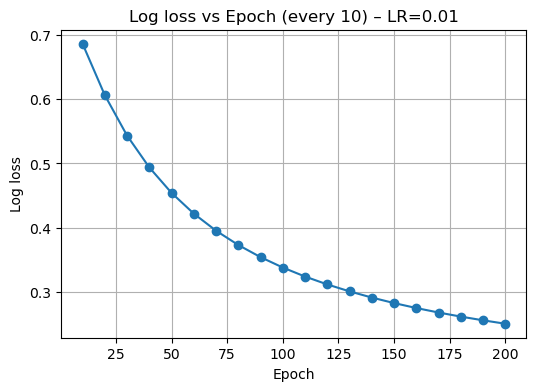

Epoch 10: log loss = 0.4578
Epoch 20: log loss = 0.3003
Epoch 30: log loss = 0.2428
Epoch 40: log loss = 0.2138
Epoch 50: log loss = 0.1964
Epoch 60: log loss = 0.1849
Epoch 70: log loss = 0.1768
Epoch 80: log loss = 0.1707
Epoch 90: log loss = 0.1660
Epoch 100: log loss = 0.1623
Epoch 110: log loss = 0.1593
Epoch 120: log loss = 0.1569
Epoch 130: log loss = 0.1548
Epoch 140: log loss = 0.1531
Epoch 150: log loss = 0.1516
Epoch 160: log loss = 0.1503
Epoch 170: log loss = 0.1491
Epoch 180: log loss = 0.1481
Epoch 190: log loss = 0.1473
Epoch 200: log loss = 0.1465


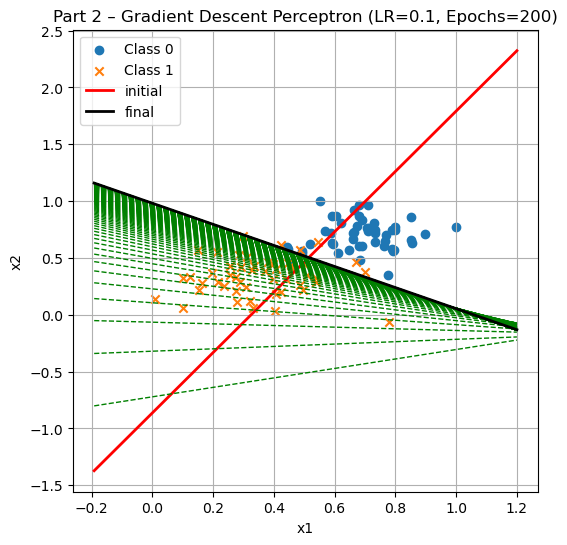

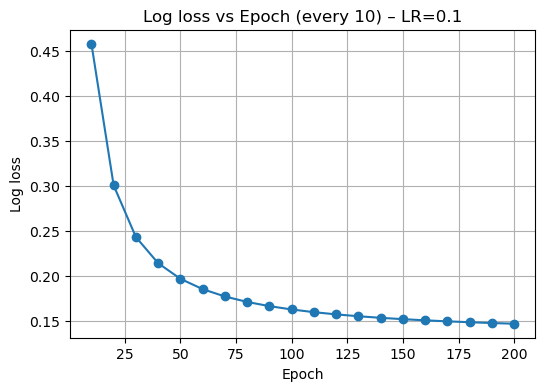

Epoch 10: log loss = 0.5660
Epoch 20: log loss = 0.3703
Epoch 30: log loss = 0.3157
Epoch 40: log loss = 0.2916
Epoch 50: log loss = 0.2784
Epoch 60: log loss = 0.2702
Epoch 70: log loss = 0.2647
Epoch 80: log loss = 0.2608
Epoch 90: log loss = 0.2580
Epoch 100: log loss = 0.2558
Epoch 110: log loss = 0.2541
Epoch 120: log loss = 0.2528
Epoch 130: log loss = 0.2517
Epoch 140: log loss = 0.2508
Epoch 150: log loss = 0.2501
Epoch 160: log loss = 0.2495
Epoch 170: log loss = 0.2490
Epoch 180: log loss = 0.2486
Epoch 190: log loss = 0.2482
Epoch 200: log loss = 0.2479


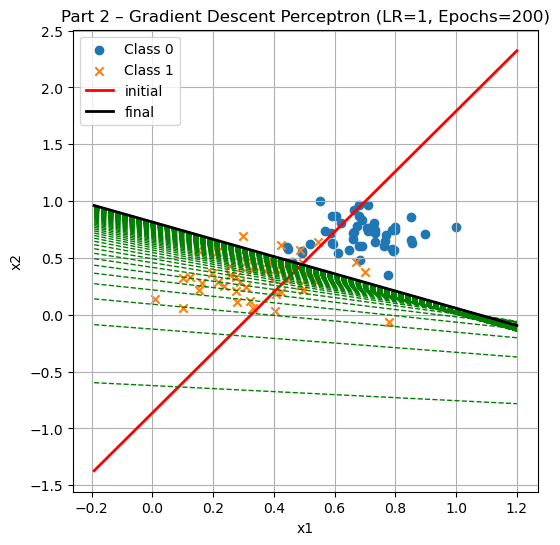

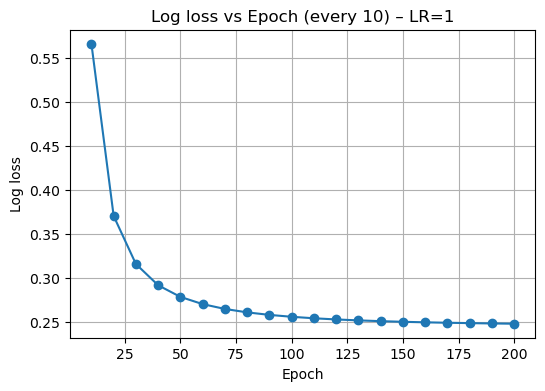

In [13]:
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))
def logLoss(trueLabels, predictedProbs, eps=1e-15):
    predictedProbs = np.clip(predictedProbs, eps, 1 - eps)
    return -np.mean(trueLabels * np.log(predictedProbs) + (1 - trueLabels) * np.log(1 - predictedProbs))
def runPerceptronGradientDescent(points, labels, lineXs, learningRate, maxEpochs,
                                 xMin=None, xMax=None, yMin=None, yMax=None):
    np.random.seed(1)

    # Random initial parameters
    gdWeights = np.random.randn(2)
    gdBias = np.random.randn()

    lossHistory = []

    plt.figure(figsize=(6, 6))
    plotData(points, labels)

    if xMin is not None and xMax is not None:
        plt.xlim(xMin, xMax)
    if yMin is not None and yMax is not None:
        plt.ylim(yMin, yMax)

    # Initial line in red
    if abs(gdWeights[1]) > 1e-8:
        lineYs = -(gdWeights[0] * lineXs + gdBias) / gdWeights[1]
        plt.plot(lineXs, lineYs, "r-", linewidth=2, label="initial")

    for epoch in range(maxEpochs):
        zValues = points @ gdWeights + gdBias
        predictedProbs = sigmoid(zValues)
        currentLoss = logLoss(labels, predictedProbs)
        lossHistory.append(currentLoss)

        for pointVector, trueLabel in zip(points, labels):
            z = np.dot(gdWeights, pointVector) + gdBias
            predictedProb = sigmoid(z)

            error = trueLabel - predictedProb

            gdBias += learningRate * error
            gdWeights += learningRate * error * pointVector

        if (epoch + 1) % 10 == 0:
            print(f"Epoch {epoch+1}: log loss = {currentLoss:.4f}")

        # Intermediate line in green and dashed
        if abs(gdWeights[1]) > 1e-8:
            lineYs = -(gdWeights[0] * lineXs + gdBias) / gdWeights[1]
            plt.plot(lineXs, lineYs, "g--", linewidth=1)

    # Final line in black
    if abs(gdWeights[1]) > 1e-8:
        lineYs = -(gdWeights[0] * lineXs + gdBias) / gdWeights[1]
        plt.plot(lineXs, lineYs, "k-", linewidth=2, label="final")

    plt.title(f"Part 2 – Gradient Descent Perceptron (LR={learningRate}, Epochs={maxEpochs})")
    plt.legend()
    plt.show()

    # Log Loss Plot
    epochs = np.arange(1, len(lossHistory) + 1)
    sampledEpochs = np.arange(10, len(lossHistory) + 1, 10)
    sampledLoss = np.array(lossHistory)[sampledEpochs - 1]

    plt.figure(figsize=(6, 4))
    plt.plot(sampledEpochs, sampledLoss, marker="o")
    plt.xlabel("Epoch")
    plt.ylabel("Log loss")
    plt.title(f"Log loss vs Epoch (every 10) – LR={learningRate}")
    plt.grid(True)
    plt.show()

    return gdWeights, gdBias, lossHistory

gdWeights, gdBias, lossHistory = runPerceptronGradientDescent(
    points=points,
    labels=labels,
    lineXs=lineXs,
    learningRate=0.01,
    maxEpochs=65
)
gdWeights, gdBias, lossHistory = runPerceptronGradientDescent(
    points=points,
    labels=labels,
    lineXs=lineXs,
    learningRate=0.1,
    maxEpochs=65
)
gdWeights, gdBias, lossHistory = runPerceptronGradientDescent(
    points=points,
    labels=labels,
    lineXs=lineXs,
    learningRate=1,
    maxEpochs=65
)
gdWeights, gdBias, lossHistory = runPerceptronGradientDescent(
    points=points,
    labels=labels,
    lineXs=lineXs,
    learningRate=0.01,
    maxEpochs=200
)
gdWeights, gdBias, lossHistory = runPerceptronGradientDescent(
    points=points,
    labels=labels,
    lineXs=lineXs,
    learningRate=0.1,
    maxEpochs=200
)
gdWeights, gdBias, lossHistory = runPerceptronGradientDescent(
    points=points,
    labels=labels,
    lineXs=lineXs,
    learningRate=1,
    maxEpochs=200
)

### Analysis

The perceptron trained with gradient descent was evaluated using the same dataset and learning rates as in part one (0.01, 0.1, and 1.0), but over 65 and 200 epochs as opposed to only 65 epochs for the heuristic approach.

#### Learning Rate = 0.01
The log-loss decreases smoothly throughout training, starting around 0.68 and ending near approximately 0.42 by epoch 60.
The decision boundary moves gradually, with small incremental improvements each epoch.
This learning rate produces slow but steady and consistent progress.

##### Epoch Count Effect
At 65 epochs, the log-loss is still steadily decreasing (≈0.42), but by extending training to 200 epochs, we push it down to about 0.25, which showed that this small learning rate continues improving for a long time and plateaus very late.

#### Learning Rate = 0.1
This learning rate converges much faster than 0.01. The log-loss drops sharply from around 0.46 at epoch 10 to approximately 0.18 by epoch 60, which is even better than the previous model could muster at epoch 200.

##### Epoch Count Effect
At 65 epochs, the model already achieves the lowest loss among all rates (≈0.18). Training to 200 epochs lowers it slightly further to about 0.15, indicating that most of the learning happens early and that this rate reaches its optimal region quickly.

The decision boundary stabilizes earlier and becomes more refined as training proceeds at this learning rate.
It achieves the lowest log-loss overall and provides the best-performing boundary among the three learning rates.

#### Learning Rate = 1
Even with this large learning rate, the gradient descent version of the perceptron remains stable. Log-loss decreased from around 0.56 to roughly 0.27 by epoch 60, which showed consistent improvement.

##### Epoch Count Effect
At 65 epochs, the log-loss is around 0.27. Training to 200 epochs reduces it gradually toward 0.247, which showed that while still being stable, this rate converges plateaus at a higher loss than LR = 0.1.
Despite what would be assumed from the performance heuristic approach, this model still maintains a stable path and outcome, which demonstrates that gradient descent handles high learning rates much better than the heuristic perceptron.

### Part 2 Findings
Gradient descent produced stable and consistently improving results across all learning rates.
The 0.01 rate improved slowly but continued lowering loss all the way to 200 epochs, which showed that it had very late convergence.
The 0.1 rate learned the fastest and reached the lowest loss overall through the 200 epochs I tested. Although the biggest gains occured early for this model, smaller improvements persisted even through the 200 epochs.  
The 1.0 rate was stable and made small improving with epochs, but it was very clear that it's plateau was fast approaching at a log loss of around 0.25. 

Overall, gradient descent very clearly outperformed the heuristic approach, with the learning rate of 0.1 providing the best balance of speed and final performance.
